In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

dataset = load_digits()

print("Las clases que intentaremos predecir son: {}.".format(dataset.target_names))
print("El formato de la matriz de datos es: {}.".format(dataset.data.shape))
print("El formato de la matriz de eitquetas es: {}.".format(dataset.target.shape))

data_train, data_test, target_train, target_test = train_test_split(dataset.data,
                                                                    dataset.target,
                                                                    test_size = 0.2)

print("Ahora, el conjunto de entrenamiento tiene {} muestras y el de evaluación tiene {} muestras.".format(data_train.shape[0], data_test.shape[0]))

Las clases que intentaremos predecir son: [0 1 2 3 4 5 6 7 8 9].
El formato de la matriz de datos es: (1797, 64).
El formato de la matriz de eitquetas es: (1797,).
Ahora, el conjunto de entrenamiento tiene 1437 muestras y el de evaluación tiene 360 muestras.


---
# Tensorflow

Una de las librerías mas usadas para el desarrollo de redes neuronales, sobre todo en Deep Learning, es [Tensorflow](https://www.tensorflow.org/). Esta librería, desarrollada por Google, provee todas las herramientas necesarias para diseñar, entrenar y evaluar modelos de redes neuronales basicos y complejos.

En el siguiente bloque de código, se crea y entrena una red neuronal similar a la implementada mediante Scikit-Learn.

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
data_train = tf.expand_dims(data_train.reshape(-1, 8, 8), axis=-1)
data_test = tf.expand_dims(data_test.reshape(-1, 8, 8), axis=-1)
print(data_train.shape)

(1437, 8, 8, 1)


In [4]:
import matplotlib.pyplot as plt

def nn(lr=0.0001):
    tensorflow_nn = tf.keras.models.Sequential([
                        tf.keras.layers.InputLayer(input_shape=(8, 8, 1)),
                        tf.keras.layers.Conv2D(10, (3, 3), activation="relu", padding="same"),
                        tf.keras.layers.Dropout(0.75),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(10, activation="softmax")])

    tensorflow_nn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    metrics=["accuracy"])
    
    tensorflow_nn.build((None, 8, 8, 1))

    tensorflow_nn.summary()

    tensorflow_nn_score = tensorflow_nn.fit(data_train,
                                            target_train,
                                            batch_size=16,
                                            epochs=400,
                                            validation_data=(data_test, target_test),
                                            verbose=0)

    plt.plot(tensorflow_nn_score.history['accuracy'])
    plt.plot(tensorflow_nn_score.history['val_accuracy'])
    plt.title('Accuracy del modelo')
    plt.ylabel('Accuracy')
    plt.xlabel('Epocas')
    plt.legend(['train', 'test'], loc='lower right')
    plt.show()

    plt.plot(tensorflow_nn_score.history['loss'])
    plt.plot(tensorflow_nn_score.history['val_loss'])
    plt.title('Error del modelo')
    plt.ylabel('Error')
    plt.xlabel('Epocas')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 8, 8, 10)          100       
                                                                 
 dropout (Dropout)           (None, 8, 8, 10)          0         
                                                                 
 flatten (Flatten)           (None, 640)               0         
                                                                 
 dense (Dense)               (None, 10)                6410      
                                                                 
Total params: 6,510
Trainable params: 6,510
Non-trainable params: 0
_________________________________________________________________


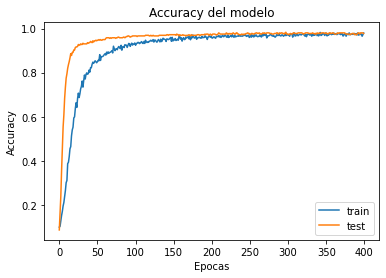

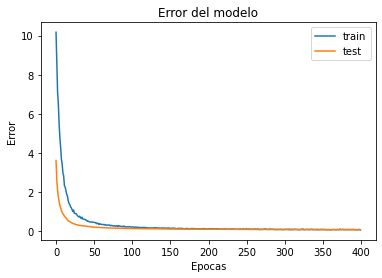

In [5]:
nn()

10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 8, 8, 10)          100       
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 10)          0         
                                                                 
 flatten_1 (Flatten)         (None, 640)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                6410      
                                                                 
Total params: 6,510
Trainable params: 6,510
Non-trainable params: 0
_________________________________________________________________


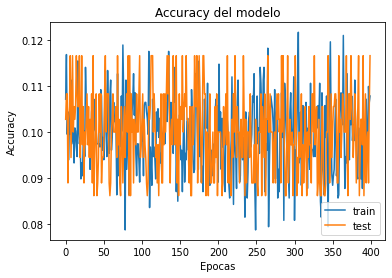

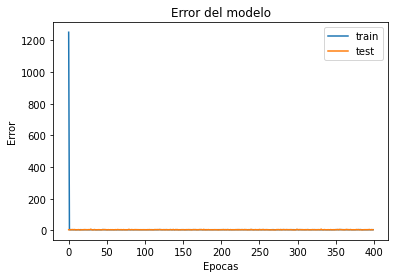

1
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 8, 8, 10)          100       
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 10)          0         
                                                                 
 flatten_2 (Flatten)         (None, 640)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                6410      
                                                                 
Total params: 6,510
Trainable params: 6,510
Non-trainable params: 0
_________________________________________________________________


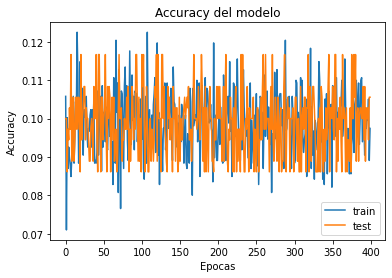

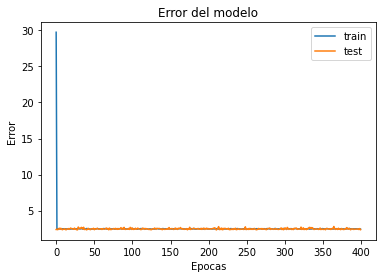

0.1
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          100       
                                                                 
 dropout_3 (Dropout)         (None, 8, 8, 10)          0         
                                                                 
 flatten_3 (Flatten)         (None, 640)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                6410      
                                                                 
Total params: 6,510
Trainable params: 6,510
Non-trainable params: 0
_________________________________________________________________


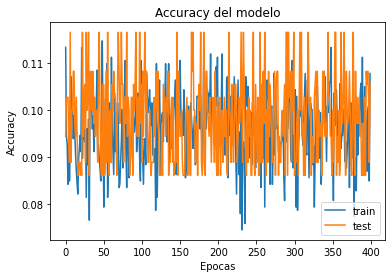

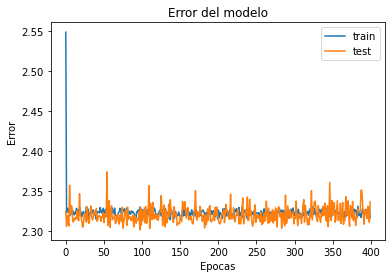

0.01
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 8, 8, 10)          100       
                                                                 
 dropout_4 (Dropout)         (None, 8, 8, 10)          0         
                                                                 
 flatten_4 (Flatten)         (None, 640)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                6410      
                                                                 
Total params: 6,510
Trainable params: 6,510
Non-trainable params: 0
_________________________________________________________________


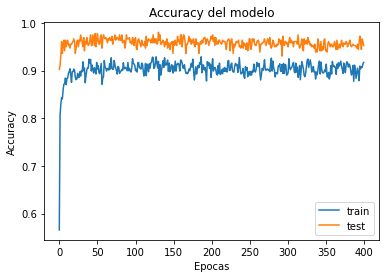

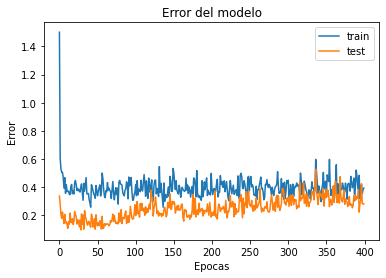

0.001
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 8, 8, 10)          100       
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 10)          0         
                                                                 
 flatten_5 (Flatten)         (None, 640)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                6410      
                                                                 
Total params: 6,510
Trainable params: 6,510
Non-trainable params: 0
_________________________________________________________________


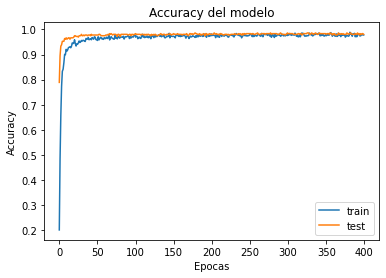

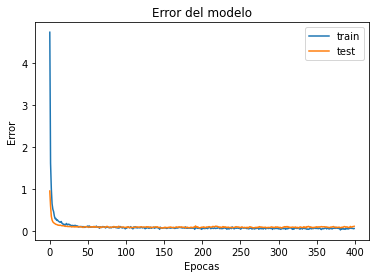

0.0001
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 8, 8, 10)          100       
                                                                 
 dropout_6 (Dropout)         (None, 8, 8, 10)          0         
                                                                 
 flatten_6 (Flatten)         (None, 640)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                6410      
                                                                 
Total params: 6,510
Trainable params: 6,510
Non-trainable params: 0
_________________________________________________________________


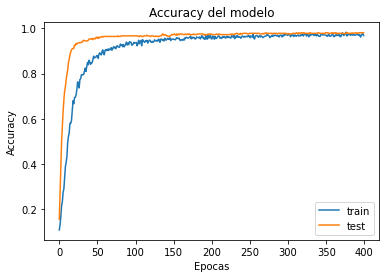

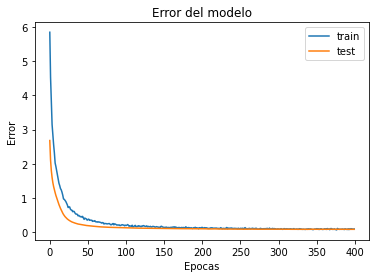

1e-05
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 8, 8, 10)          100       
                                                                 
 dropout_7 (Dropout)         (None, 8, 8, 10)          0         
                                                                 
 flatten_7 (Flatten)         (None, 640)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                6410      
                                                                 
Total params: 6,510
Trainable params: 6,510
Non-trainable params: 0
_________________________________________________________________


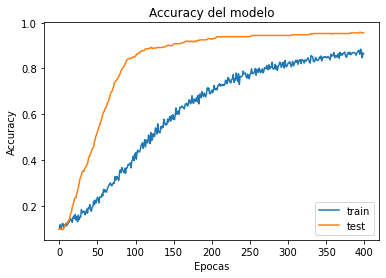

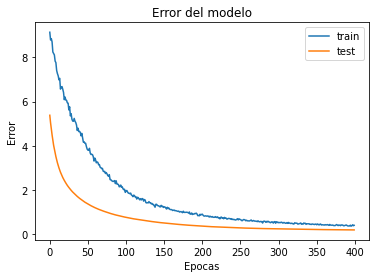

In [6]:
for lr in [10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]:
    print(lr)
    nn(lr)